## Linear Regression 
Linear regression models the relationship between one or more input variables (features) and a continuous target by fitting a linear equation to observed data. For a single feature (simple linear regression) the model is typically written as:

y = β0 + β1 x + ε

in simple we assume y= mx+c (slope formula remember high school concept)

where β0 is the intercept, β1 is the slope (coefficient), and ε is the error term. For multiple features (multiple linear regression) the model generalizes to y = β0 + β1 x1 + ... + βn xn + ε.

understand:  β0 is the intercept == constant(c),  β1 is the slope ==m, x1,x2...xn is features like height and weight of person.

Key points:
- Training objective: coefficients are usually estimated by minimizing the mean squared error (MSE) using Ordinary Least Squares (OLS).
- Common evaluation metrics: R², adjusted R², RMSE (root mean squared error), and MAE (mean absolute error).
- Interpretability: each coefficient βi represents the expected change in the target for a one-unit change in xi, holding other features constant.
- Assumptions: linearity (relationships are linear in parameters), independence of errors, homoscedasticity (constant error variance), normally distributed errors (for inference), and no high multicollinearity among features.
- Regularization: Ridge (L2) and Lasso (L1) add penalties to reduce overfitting and handle multicollinearity.
- Usage: prediction, trend estimation, feature effect interpretation, and as a baseline model in many applied domains (economics, engineering, biology, etc.).

Practical tips:
- Visualize relationships and residuals to validate assumptions.
- Standardize features when using regularized variants.
- Use cross-validation to assess generalization and select hyperparameters (e.g., regularization strength).
**Calculation example**

Suppose we predict a house price from two features: area (square feet) and number of bedrooms. The linear model is:

f(x) = w1*x1 + w2*x2 + b  (or in vector form f(x) = w · x + b)

Given:
- x = [1000, 3]  (x1 = 1000 sqft, x2 = 3 bedrooms)  
- w = [0.05, 10] (w1 = 0.05, w2 = 10)  
- b = 5000       (intercept / base price)

Step-by-step:
- w1 * x1 = 0.05 * 1000 = 50  
- w2 * x2 = 10 * 3 = 30  
- f(x) = 50 + 30 + 5000 = 5080

Interpretation: the model predicts a price of 5080 (in the same units as b).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:

np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

w = 2
b = 7

x_scaled = StandardScaler().fit_transform(x)

def compute_model(x, w, b):
    return x[:, 0] * w + b

def cost_function(x, y, f):
    m = x.shape[0]
    return (1/(2*m)) * np.sum((f - y.flatten())**2)

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i, 0] + b
        dj_dw += (f_wb - y[i]) * x[i, 0]
        dj_db += (f_wb - y[i])

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def gradient_algo(x, y, w, b, iters, alpha):
    J_history = []
    p_history = []

    for i in range(iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(cost_function(x, y, compute_model(x, w, b)))
        p_history.append([w, b])

    return w, b, J_history, p_history

w_final, b_final, J_history, p_history = gradient_algo(x_scaled, y, w, b, 200, 0.1)


tmp_f_wb = compute_model(x_scaled, w, b)


plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
plt.plot(x_scaled, tmp_f_wb, c='b', label='Prediction', linewidth=2)
plt.scatter(x_scaled, y, marker='x', c='r', label='Actual Values', alpha=0.7)

for i in range(len(x_scaled)):
    plt.plot([x_scaled[i, 0], x_scaled[i, 0]],
             [tmp_f_wb[i], y[i, 0]],
             'k--', alpha=0.5, linewidth=0.8)

plt.xlabel('Scaled X')
plt.ylabel('Y')
plt.title('Linear Regression With Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
residuals = y.flatten() - tmp_f_wb
plt.scatter(x_scaled, residuals, c='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel("Scaled X")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [2]:
from sklearn.preprocessing import LabelEncoder
df_csv = pd.read_csv("StudentsPerformance[1].csv")
df = pd.DataFrame(df_csv)
df = df.dropna()
df['gender'] = df['gender'].apply(lambda x: 1 if x=="male" else 0)
encoding_features = ['race/ethnicity','parental level of education', 'lunch','test preparation course']
label_en = LabelEncoder()
for feature in encoding_features:
    print(label_en.fit(df[feature]).classes_)
    df[feature] =label_en.fit_transform(df[feature])

['group A' 'group B' 'group C' 'group D' 'group E']
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
['free/reduced' 'standard']
['completed' 'none']


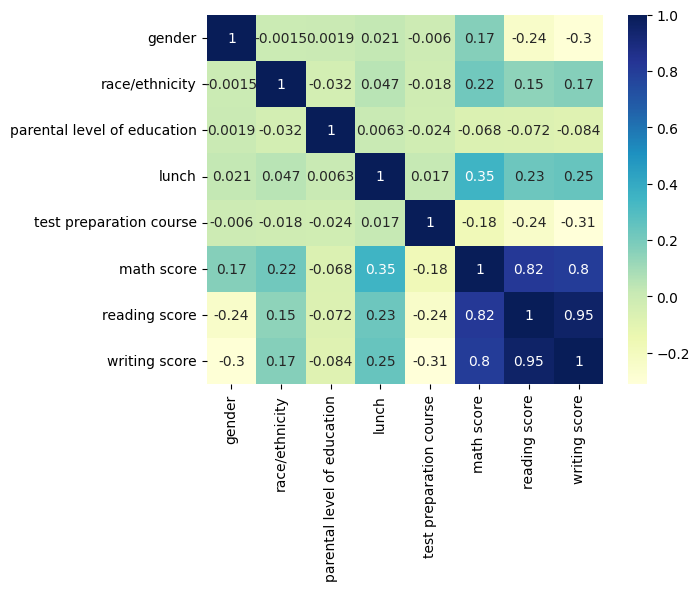

In [3]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

# target = Math Score

# Use these features:

Best Predictors:

1. Reading score

2. Writing score

3. Lunch (standard vs free/reduced)

4. Test preparation course

5. Race/Ethnicity (optional)

# Remove (Irrelevant):

1. Gender

2. Parental education (very low impact)

In [4]:

selected_feature = ['reading score', 'writing score', 'lunch']
target =  'math score'

x = df[selected_feature]
y = df[target]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=104, test_size=0.25,shuffle=True)
x_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = pd.DataFrame(StandardScaler().fit_transform(x_test),columns=selected_feature)
x_scaled = pd.DataFrame(x_scaled, columns = selected_feature)

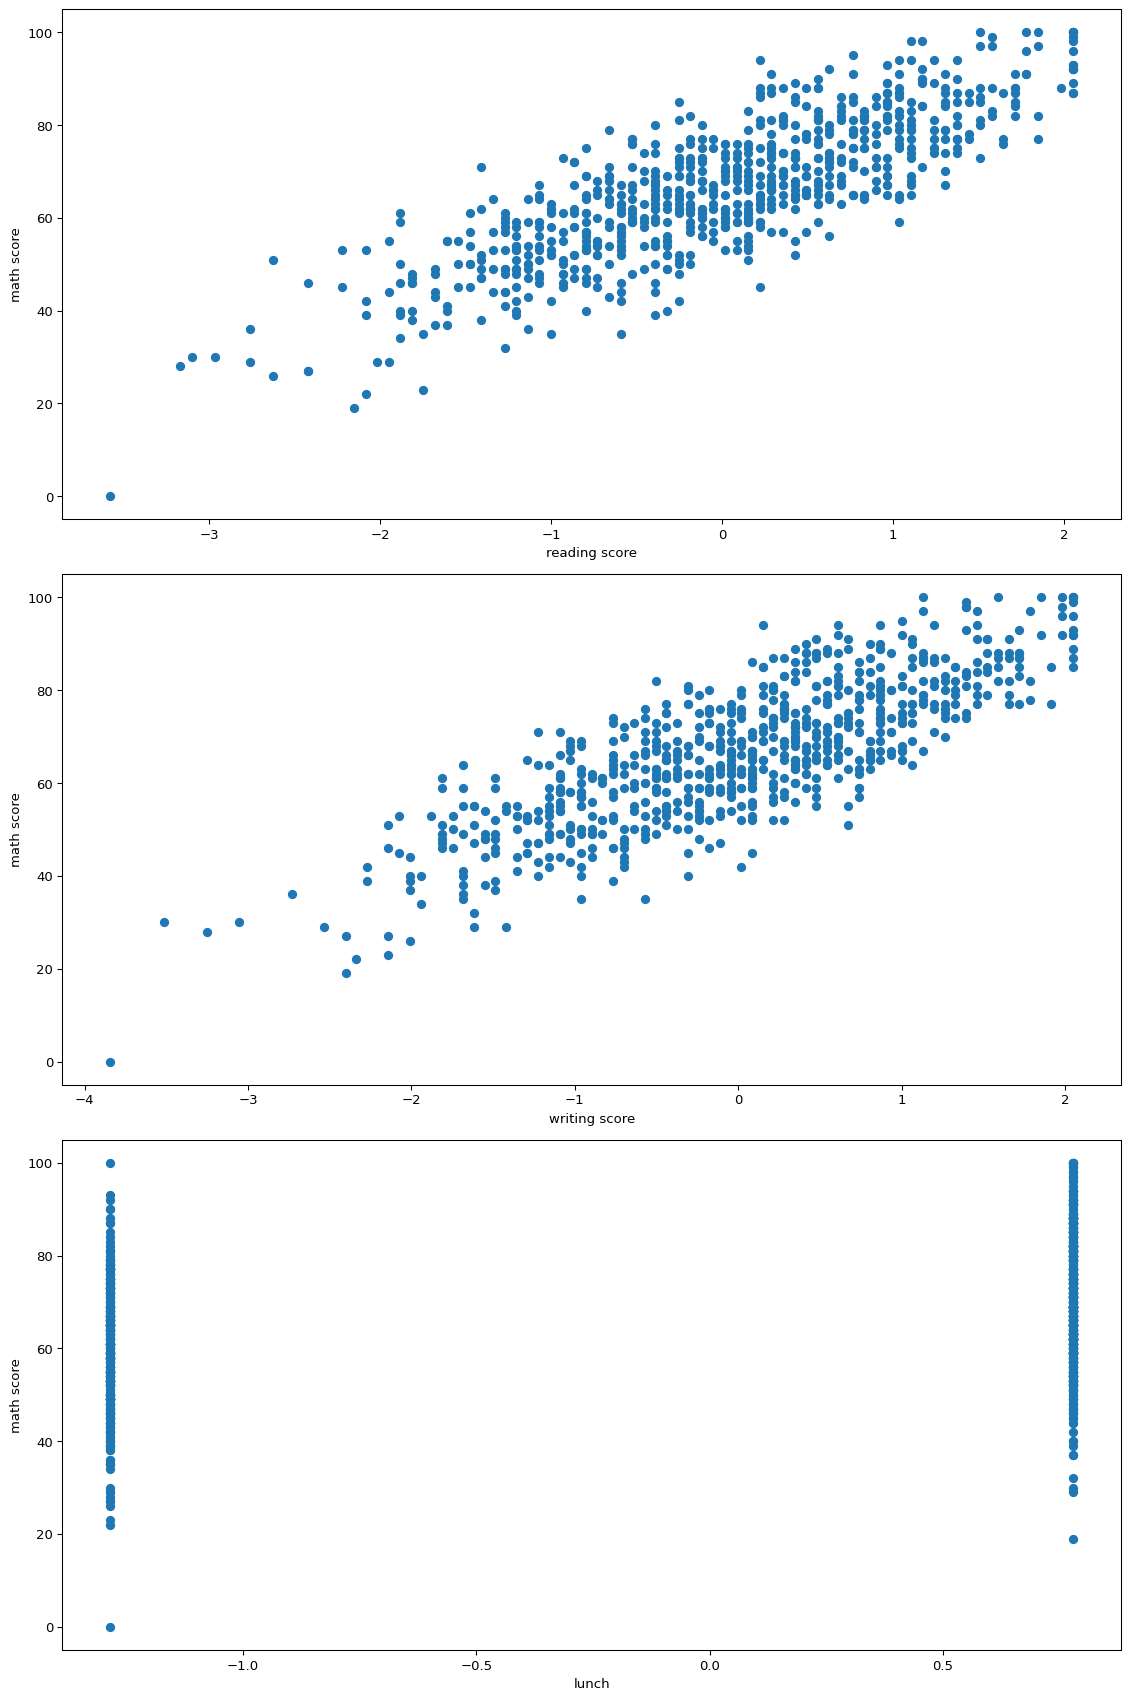

In [5]:
# check each feature how it is contributing to the target 
fig, ax = plt.subplots(len(selected_feature), 1, figsize=(12, 18), dpi=95)

for i, col in enumerate(selected_feature):
    ax[i].scatter(x_scaled[col], y_train)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel(target)
    
plt.tight_layout()
plt.show()

In [6]:
linear_model = LinearRegression()
linear_model.fit(x_scaled,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = linear_model.predict(x_test_scaled)
y_pred

array([73.33983162, 65.15419734, 78.36857722, 35.5512119 , 61.52176089,
       58.1856488 , 41.03528248, 57.12033807, 73.1707196 , 73.42077482,
       68.1520854 , 80.22021134, 64.07154959, 58.58747901, 35.46015731,
       81.4546341 , 48.46926741, 66.78322468, 62.13897227, 66.45222627,
       67.16771786, 47.76388721, 75.20157714, 66.08507011, 83.53898641,
       70.48649293, 55.03598575, 79.37028178, 78.8340136 , 73.03628163,
       64.53698597, 87.86957744, 95.36716854, 25.88832529, 52.00342364,
       57.35305626, 59.34923975, 55.5549169 , 60.90454951, 77.12404307,
       65.00242235, 80.52376133, 73.10711343, 76.90143628, 63.60611321,
       65.85235192, 70.23643772, 87.33330926, 79.60299997, 42.50242342,
       79.83571816, 64.07154959, 76.82049308, 64.76970416, 80.30115454,
       62.74895801, 88.48678881, 44.89032573, 56.80667668, 70.70909973,
       63.7578882 , 59.03557836, 70.93459229, 67.93670423, 86.09888651,
       67.23854966, 82.78011144, 51.00894471, 69.17112698, 64.68

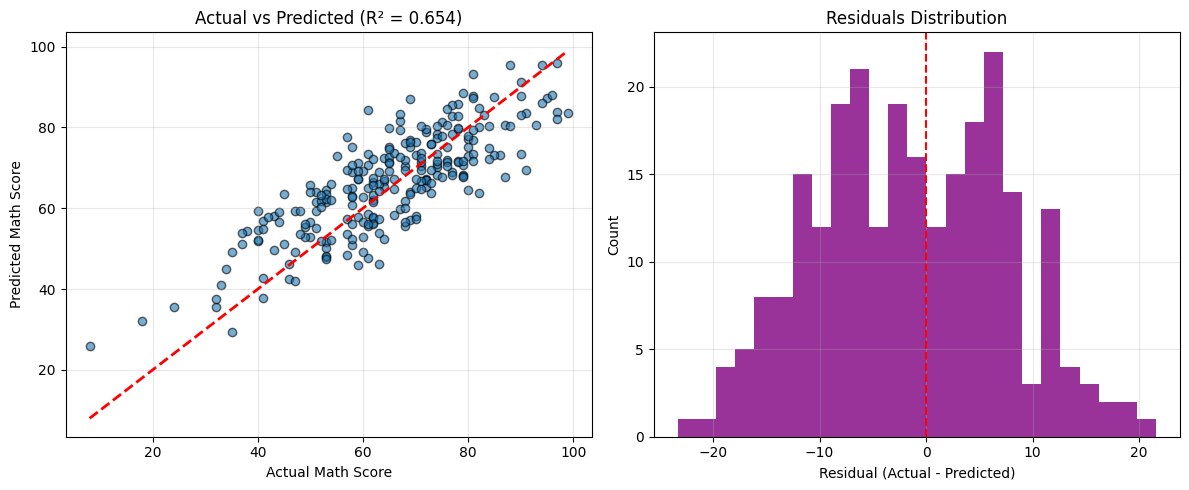

In [ ]:
y_true = y_test.values
y_hat = y_pred

r2 = r2_score(y_true, y_hat)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y_true, y_hat, alpha=0.6, edgecolor='k')
min_val = min(y_true.min(), y_hat.min())
max_val = max(y_true.max(), y_hat.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Math Score')
axes[0].set_ylabel('Predicted Math Score')
axes[0].set_title(f'Actual vs Predicted (R² = {r2:.3f})')
axes[0].grid(alpha=0.3)

# Residuals distribution
residuals = y_true - y_hat
axes[1].hist(residuals, bins=25, color='purple', alpha=0.8)
axes[1].axvline(0, color='red', linestyle='--', linewidth=1.5)
axes[1].set_xlabel('Residual (Actual - Predicted)')
axes[1].set_ylabel('Count')
axes[1].set_title('Residuals Distribution')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
print(f"R² (model): {r2:.3f} -> explains {r2*100:.1f}% of variance")

mean_pred = np.full_like(y_true, y_true.mean(), dtype=float)
r2_baseline = r2_score(y_true, mean_pred)
print(f"R² (mean predictor): {r2_baseline:.3f} (by definition ~0)")

print("Best R² = 1.0 (perfect). Worst R² = -inf (unbounded negative); values < 0 indicate worse than mean predictor.")

R² (model): 0.654 -> explains 65.4% of variance
R² (mean predictor): 0.000 (by definition ~0)
Best R² = 1.0 (perfect). Worst R² = -inf (unbounded negative); values < 0 indicate worse than mean predictor.
